# Lab.8: Parsing

## Authors: Edison Jair Bejarano Sepulveda - Roberto Ariosa

Statement:

Consider the following sentence: 
- Lazy cats play with mice.

Expand the grammar of the example related to non-probabilistic chart parsers in order to subsume this new sentence.

Perform the constituency parsing using a BottomUpChartParser, a BottomUpLeftCornerChartParser and a LeftCornerChartParser.

For each one of them, provide the resulting tree, the number of edges and the list of explored edges.

Which parser is the most efficient for parsing the sentence?

Which edges are filtered out by each parser and why?

In [1]:
!pip install svgling
!pip3 install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 2.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# Libraries
import nltk
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk import CFG, ChartParser
from nltk import TopDownChartParser
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from IPython.display import display
from colorama import Back, Fore, Style

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Non-probabilistic parsers: Charts


In [12]:
grammar = CFG.fromstring('''
  NP  -> NNS | JJ NNS | NP CC NP
  NNS -> "cats" | "dogs" | "mice" | NNS CC NNS 
  JJ  -> "big" | "small"
  CC  -> "and" | "or"
  ''')

parser = ChartParser(grammar, trace=1)

sent = ['small','cats','and','mice']

parse = parser.parse(sent)

|.  small  .   cats  .   and   .   mice  .|
|[---------]         .         .         .| [0:1] 'small'
|.         [---------]         .         .| [1:2] 'cats'
|.         .         [---------]         .| [2:3] 'and'
|.         .         .         [---------]| [3:4] 'mice'
|[---------]         .         .         .| [0:1] JJ -> 'small' *
|[--------->         .         .         .| [0:1] NP -> JJ * NNS
|.         [---------]         .         .| [1:2] NNS -> 'cats' *
|.         [---------]         .         .| [1:2] NP -> NNS *
|.         [--------->         .         .| [1:2] NNS -> NNS * CC NNS
|[-------------------]         .         .| [0:2] NP -> JJ NNS *
|[------------------->         .         .| [0:2] NP -> NP * CC NP
|.         [--------->         .         .| [1:2] NP -> NP * CC NP
|.         .         [---------]         .| [2:3] CC -> 'and' *
|.         [------------------->         .| [1:3] NNS -> NNS CC * NNS
|[----------------------------->         .| [0:3] NP -> NP CC * NP

In [ ]:
ts = []
for t in parse:
  ts.append(t)
print('Number of trees', len(ts))
print(ts[0])


Number of trees 2
(NP (JJ small) (NNS (NNS cats) (CC and) (NNS mice)))


In [ ]:
# achieve the list of applied edges
parse = parser.chart_parse(['small','cats','and','mice'])
print("TD num edges = ", parse.num_edges())

|.  small  .   cats  .   and   .   mice  .|
|[---------]         .         .         .| [0:1] 'small'
|.         [---------]         .         .| [1:2] 'cats'
|.         .         [---------]         .| [2:3] 'and'
|.         .         .         [---------]| [3:4] 'mice'
|[---------]         .         .         .| [0:1] JJ -> 'small' *
|[--------->         .         .         .| [0:1] NP -> JJ * NNS
|.         [---------]         .         .| [1:2] NNS -> 'cats' *
|.         [---------]         .         .| [1:2] NP -> NNS *
|.         [--------->         .         .| [1:2] NNS -> NNS * CC NNS
|[-------------------]         .         .| [0:2] NP -> JJ NNS *
|[------------------->         .         .| [0:2] NP -> NP * CC NP
|.         [--------->         .         .| [1:2] NP -> NP * CC NP
|.         .         [---------]         .| [2:3] CC -> 'and' *
|.         [------------------->         .| [1:3] NNS -> NNS CC * NNS
|[----------------------------->         .| [0:3] NP -> NP CC * NP

In [ ]:
parse.edges()

[[Edge: [0:1] 'small'],
 [Edge: [1:2] 'cats'],
 [Edge: [2:3] 'and'],
 [Edge: [3:4] 'mice'],
 [Edge: [0:1] JJ -> 'small' *],
 [Edge: [0:1] NP -> JJ * NNS],
 [Edge: [1:2] NNS -> 'cats' *],
 [Edge: [1:2] NP -> NNS *],
 [Edge: [1:2] NNS -> NNS * CC NNS],
 [Edge: [0:2] NP -> JJ NNS *],
 [Edge: [0:2] NP -> NP * CC NP],
 [Edge: [1:2] NP -> NP * CC NP],
 [Edge: [2:3] CC -> 'and' *],
 [Edge: [1:3] NNS -> NNS CC * NNS],
 [Edge: [0:3] NP -> NP CC * NP],
 [Edge: [1:3] NP -> NP CC * NP],
 [Edge: [3:4] NNS -> 'mice' *],
 [Edge: [3:4] NP -> NNS *],
 [Edge: [3:4] NNS -> NNS * CC NNS],
 [Edge: [1:4] NNS -> NNS CC NNS *],
 [Edge: [1:4] NP -> NNS *],
 [Edge: [1:4] NNS -> NNS * CC NNS],
 [Edge: [0:4] NP -> JJ NNS *],
 [Edge: [0:4] NP -> NP * CC NP],
 [Edge: [1:4] NP -> NP * CC NP],
 [Edge: [3:4] NP -> NP * CC NP],
 [Edge: [0:4] NP -> NP CC NP *],
 [Edge: [1:4] NP -> NP CC NP *]]

In [ ]:
parser = nltk.TopDownChartParser(grammar, trace=1)
parse = parser.parse(sent)

ts = []
for t in parse:
  ts.append(t)
len(ts)


|.  small  .   cats  .   and   .   mice  .|
|[---------]         .         .         .| [0:1] 'small'
|.         [---------]         .         .| [1:2] 'cats'
|.         .         [---------]         .| [2:3] 'and'
|.         .         .         [---------]| [3:4] 'mice'
|>         .         .         .         .| [0:0] NP -> * NNS
|>         .         .         .         .| [0:0] NP -> * JJ NNS
|>         .         .         .         .| [0:0] NP -> * NP CC NP
|>         .         .         .         .| [0:0] NNS -> * NNS CC NNS
|>         .         .         .         .| [0:0] JJ -> * 'small'
|[---------]         .         .         .| [0:1] JJ -> 'small' *
|[--------->         .         .         .| [0:1] NP -> JJ * NNS
|.         >         .         .         .| [1:1] NNS -> * 'cats'
|.         >         .         .         .| [1:1] NNS -> * NNS CC NNS
|.         [---------]         .         .| [1:2] NNS -> 'cats' *
|[-------------------]         .         .| [0:2] NP -> JJ NNS *


2

In [ ]:
for t in ts:
  print(t)

(NP (JJ small) (NNS (NNS cats) (CC and) (NNS mice)))
(NP (NP (JJ small) (NNS cats)) (CC and) (NP (NNS mice)))


# Probabilistic parsers

## Charts

## Viterbi

# Mandatory exercise

In [7]:
sentence = 'lazy cats play with mice'
# Tokenize sentence
lemmatizer = WordNetLemmatizer()
word_list = nltk.word_tokenize(sentence)

print(word_list)


['lazy', 'cats', 'play', 'with', 'mice']


### Usesfull functions

In [37]:
# Function to get the constituency parsing
def chart_parser_NonProbabilistic(parser_option,sentence, grammar):
  if parser_option == 1:

    print(Fore.YELLOW +'*****-----  Chart Parser  -----*****')
    tic = time.time()
    parser = ChartParser(grammar, trace=1)
    ts = []
    for t in parse:
      ts.append(t)
    print(Fore.BLUE +'Number of trees: ', len(ts))
    #parse = parser.parse(sentence)
    chart = parser.chart_parse(sentence)
    # Number of edges
    Num_edges = chart.num_edges()
    toc = time.time()
    total_time = toc - tic
    print(f'Number of edges: {Num_edges}')
    print(f'Tres generated in {total_time} seconds')
    # Exploring trees 
    i = 0
    for x in ts:
      i +=1
      print(Fore.GREEN +f'Tree Number {i}')
      display(x)
    # List of edges
    list_edges = []
    j = 0
    for e in chart.edges():
      j +=1
      edge = str(e)
      list_edges.append(edge)
      print(Fore.GREEN +f'Edge #{j} =>'+Fore.BLUE+f'{edge}')


  return parse, ts, Num_edges, total_time



def chart_parser_generator(parser_option,sentence, grammar):
  
  if parser_option == 1:

    print(Fore.YELLOW +'*****-----  Botton Up Chart Parser    -----*****')
    tic = time.time()
    parser = nltk.BottomUpChartParser(grammar)
  elif parser_option == 2:

    print(Fore.YELLOW +'*****-----  Botton Up Left Chart Parser    -----*****')
    tic = time.time()
    parser = nltk.BottomUpLeftCornerChartParser(grammar)

  elif parser_option == 3:
    print(Fore.YELLOW +'*****-----  Left Corner Chart parser    -----*****')
    tic = time.time()
    parser = nltk.LeftCornerChartParser(grammar)
    
  else:
    print(Fore.RED +'Wrong input, please choose into 1 and 4 -> (1) Botton up chart parser')
    return False

  while False:
    break
  parse = parser.parse(sentence)
  print(parse)
  # Number of tree
  ts = []
  for t in parse:
    ts.append(t)
  print(Fore.BLUE +'Number of trees: ', len(ts))
  chart = parser.chart_parse(sentence)
  # Number of edges
  Num_edges = chart.num_edges()
  toc = time.time()
  total_time = toc - tic
  print(f'Number of edges: {Num_edges}')
  print(f'Tres generated in {total_time} seconds')
  # Exploring trees 
  i = 0
  for x in ts:
    i +=1
    print(Fore.GREEN +f'Tree Number {i}')
    display(x)
  # List of edges
  list_edges = []
  j = 0
  for e in chart.edges():
    j +=1
    edge = str(e)
    list_edges.append(edge)
    print(Fore.GREEN +f'Edge #{j} =>'+Fore.BLUE+f'{edge}')


  return parse, ts, Num_edges, total_time


# Grammar
grammar = nltk.CFG.fromstring("""

                                    S -> NP VP

                                    NP -> NNP NNS | PP NP | NNS
                                    
                                    VP -> VBZ | VBZ NP

                                    PP -> IN

                                    NNS -> "cats" | NNS

                                    NNS -> "mice" | NNS

                                    NNP -> "lazy" | NNS

                                    VBZ -> "play"
                                    
                                    IN -> "with" 
  
                                """)

### Chart Parser

In [38]:
# Getting Bottom Up parser
parse_0, ts_0, Num_edges_0, total_time_0 = chart_parser_NonProbabilistic(1,word_list,grammar)

*****-----  Chart Parser  -----*****
Number of trees:  0
|.  lazy .  cats .  play .  with .  mice .|
|[-------]       .       .       .       .| [0:1] 'lazy'
|.       [-------]       .       .       .| [1:2] 'cats'
|.       .       [-------]       .       .| [2:3] 'play'
|.       .       .       [-------]       .| [3:4] 'with'
|.       .       .       .       [-------]| [4:5] 'mice'
|[-------]       .       .       .       .| [0:1] NNP -> 'lazy' *
|[------->       .       .       .       .| [0:1] NP -> NNP * NNS
|.       [-------]       .       .       .| [1:2] NNS -> 'cats' *
|.       [-------]       .       .       .| [1:2] NP -> NNS *
|.       [-------]       .       .       .| [1:2] NNS -> NNS *
|.       [-------]       .       .       .| [1:2] NNP -> NNS *
|[---------------]       .       .       .| [0:2] NP -> NNP NNS *
|[--------------->       .       .       .| [0:2] S  -> NP * VP
|.       [------->       .       .       .| [1:2] NP -> NNP * NNS
|.       [-------]       .      

### Bottom Up Chart Parser

*****-----  Botton Up Chart Parser    -----*****
<generator object Chart.parses at 0x7f666e1e1950>
Number of trees:  4
Number of edges: 56
Tres generated in 0.011035680770874023 seconds
Tree Number 1


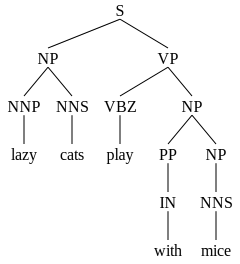

Tree Number 2


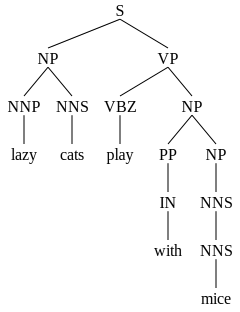

Tree Number 3


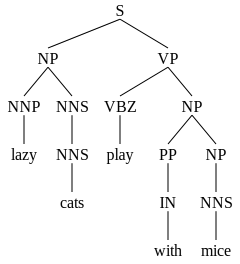

Tree Number 4


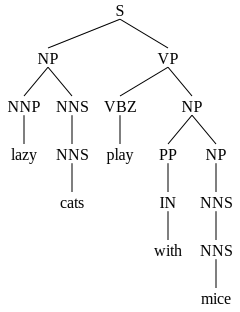

Edge #1 =>[0:1] 'lazy'
Edge #2 =>[1:2] 'cats'
Edge #3 =>[2:3] 'play'
Edge #4 =>[3:4] 'with'
Edge #5 =>[4:5] 'mice'
Edge #6 =>[0:0] NNP -> * 'lazy'
Edge #7 =>[0:1] NNP -> 'lazy' *
Edge #8 =>[0:0] NP -> * NNP NNS
Edge #9 =>[0:1] NP -> NNP * NNS
Edge #10 =>[1:1] NNS -> * 'cats'
Edge #11 =>[1:2] NNS -> 'cats' *
Edge #12 =>[1:1] NP -> * NNS
Edge #13 =>[1:1] NNS -> * NNS
Edge #14 =>[1:1] NNP -> * NNS
Edge #15 =>[0:2] NP -> NNP NNS *
Edge #16 =>[1:2] NP -> NNS *
Edge #17 =>[1:2] NNS -> NNS *
Edge #18 =>[1:2] NNP -> NNS *
Edge #19 =>[1:1] NP -> * NNP NNS
Edge #20 =>[1:2] NP -> NNP * NNS
Edge #21 =>[1:1] S  -> * NP VP
Edge #22 =>[1:2] S  -> NP * VP
Edge #23 =>[0:0] S  -> * NP VP
Edge #24 =>[0:2] S  -> NP * VP
Edge #25 =>[2:2] VBZ -> * 'play'
Edge #26 =>[2:3] VBZ -> 'play' *
Edge #27 =>[2:2] VP -> * VBZ
Edge #28 =>[2:2] VP -> * VBZ NP
Edge #29 =>[2:3] VP -> VBZ *
Edge #30 =>[2:3] VP -> VBZ * NP
Edge #31 =>[1:3] S  -> NP VP *
Edge #32 =>[0:3] S  -> NP VP *
Edge #33 =>[3:3] IN -> * 'with'
Edge #34

In [39]:
# Getting Bottom Up parser
parse_1, ts_1, Num_edges_1, total_time_1 = chart_parser_generator(1,word_list,grammar)

### Bottom Up Left Corner Chart

*****-----  Botton Up Left Chart Parser    -----*****
<generator object Chart.parses at 0x7f666e1f3cd0>
Number of trees:  4
Number of edges: 34
Tres generated in 0.003612995147705078 seconds
Tree Number 1


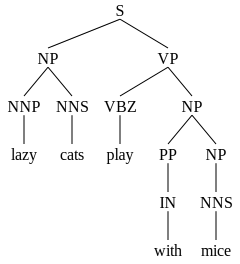

Tree Number 2


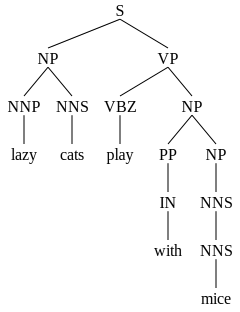

Tree Number 3


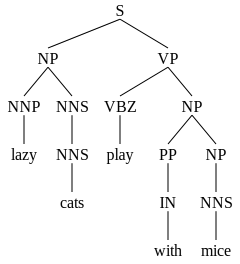

Tree Number 4


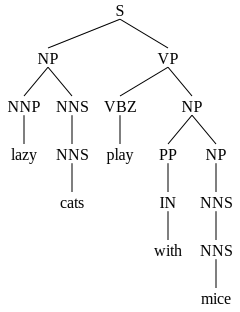

Edge #1 =>[0:1] 'lazy'
Edge #2 =>[1:2] 'cats'
Edge #3 =>[2:3] 'play'
Edge #4 =>[3:4] 'with'
Edge #5 =>[4:5] 'mice'
Edge #6 =>[0:1] NNP -> 'lazy' *
Edge #7 =>[0:1] NP -> NNP * NNS
Edge #8 =>[1:2] NNS -> 'cats' *
Edge #9 =>[1:2] NP -> NNS *
Edge #10 =>[1:2] NNS -> NNS *
Edge #11 =>[1:2] NNP -> NNS *
Edge #12 =>[0:2] NP -> NNP NNS *
Edge #13 =>[0:2] S  -> NP * VP
Edge #14 =>[1:2] NP -> NNP * NNS
Edge #15 =>[1:2] S  -> NP * VP
Edge #16 =>[2:3] VBZ -> 'play' *
Edge #17 =>[2:3] VP -> VBZ *
Edge #18 =>[2:3] VP -> VBZ * NP
Edge #19 =>[0:3] S  -> NP VP *
Edge #20 =>[1:3] S  -> NP VP *
Edge #21 =>[3:4] IN -> 'with' *
Edge #22 =>[3:4] PP -> IN *
Edge #23 =>[3:4] NP -> PP * NP
Edge #24 =>[4:5] NNS -> 'mice' *
Edge #25 =>[4:5] NP -> NNS *
Edge #26 =>[4:5] NNS -> NNS *
Edge #27 =>[4:5] NNP -> NNS *
Edge #28 =>[4:5] NP -> NNP * NNS
Edge #29 =>[4:5] S  -> NP * VP
Edge #30 =>[3:5] NP -> PP NP *
Edge #31 =>[3:5] S  -> NP * VP
Edge #32 =>[2:5] VP -> VBZ NP *
Edge #33 =>[0:5] S  -> NP VP *
Edge #34 =>[1:5

In [40]:
# Getting up left chart parser
parse_2, ts_2, Num_edges_2, total_time_2 = chart_parser_generator(2,word_list,grammar)

### Left Corner Chart Parser

*****-----  Left Corner Chart parser    -----*****
<generator object Chart.parses at 0x7f666e1e1bd0>
Number of trees:  4
Number of edges: 30
Tres generated in 0.0031499862670898438 seconds
Tree Number 1


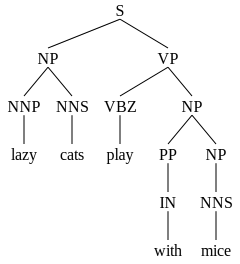

Tree Number 2


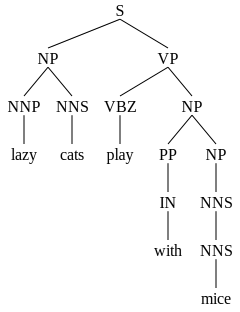

Tree Number 3


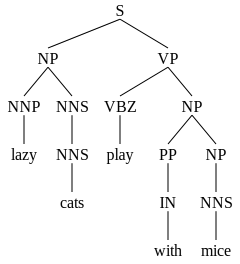

Tree Number 4


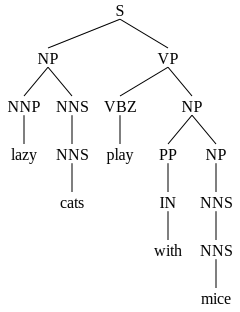

Edge #1 =>[0:1] 'lazy'
Edge #2 =>[1:2] 'cats'
Edge #3 =>[2:3] 'play'
Edge #4 =>[3:4] 'with'
Edge #5 =>[4:5] 'mice'
Edge #6 =>[0:1] NNP -> 'lazy' *
Edge #7 =>[0:1] NP -> NNP * NNS
Edge #8 =>[1:2] NNS -> 'cats' *
Edge #9 =>[1:2] NP -> NNS *
Edge #10 =>[1:2] NNS -> NNS *
Edge #11 =>[1:2] NNP -> NNS *
Edge #12 =>[0:2] NP -> NNP NNS *
Edge #13 =>[0:2] S  -> NP * VP
Edge #14 =>[1:2] S  -> NP * VP
Edge #15 =>[2:3] VBZ -> 'play' *
Edge #16 =>[2:3] VP -> VBZ *
Edge #17 =>[2:3] VP -> VBZ * NP
Edge #18 =>[0:3] S  -> NP VP *
Edge #19 =>[1:3] S  -> NP VP *
Edge #20 =>[3:4] IN -> 'with' *
Edge #21 =>[3:4] PP -> IN *
Edge #22 =>[3:4] NP -> PP * NP
Edge #23 =>[4:5] NNS -> 'mice' *
Edge #24 =>[4:5] NP -> NNS *
Edge #25 =>[4:5] NNS -> NNS *
Edge #26 =>[4:5] NNP -> NNS *
Edge #27 =>[3:5] NP -> PP NP *
Edge #28 =>[2:5] VP -> VBZ NP *
Edge #29 =>[0:5] S  -> NP VP *
Edge #30 =>[1:5] S  -> NP VP *


In [41]:
# Getting Left Corner Parser
parse_3, ts_3, Num_edges_3, total_time_3 = chart_parser_generator(3,word_list,grammar)

### Analysis


In [49]:
data = [['Chart Parser', Num_edges_0,total_time_0],['Botton Up Chart Parser', Num_edges_1,total_time_1], ['Bottom Up Left Corner Chart', Num_edges_2,total_time_2], ['Left Corner Chart parser', Num_edges_3, total_time_3]]
df = pd.DataFrame(data, columns=['Parser', '# Edges', 'Time'])
df.head()


,Parser,# Edges,Time
0,Chart Parser,34,0.022585
1,Botton Up Chart Parser,56,0.011036
2,Bottom Up Left Corner Chart,34,0.003613
3,Left Corner Chart parser,30,0.003150


### Which parser is the most efficient for parsing the sentence
To start, it is important define that the task of the classes and interfaces for producing tree structures that represent the internal organization of a text it is known as “parsing”.

Two basic approaches to parsing are top-down parsing and bottom-up parsing. In the top-down approach, a parser tries to derive the given string from the start symbol by rewriting nonterminals one by one using productions. The nonterminal on the left hand side of a production is replaced by it right hand side in the string being parsed. In the bottom-up approach, a parser tries to reduce the given string to the start symbol step by step using productions. The right hand side of a production found in the string being parsed is replaced by its left hand side. 

Observing the data recovery from all the methods, it is possible to analyse that left corner chart  parser is the method in where less edges and time it was obtained (30 0,003150), based on this results it is possible to determine that this method was the most efficient. 

#### Number of edges by parser method

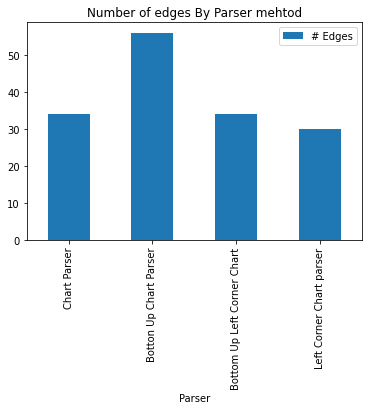

In [50]:
df.plot('Parser','# Edges',kind = 'bar',title = 'Number of edges By Parser mehtod')

#### Time by parser method

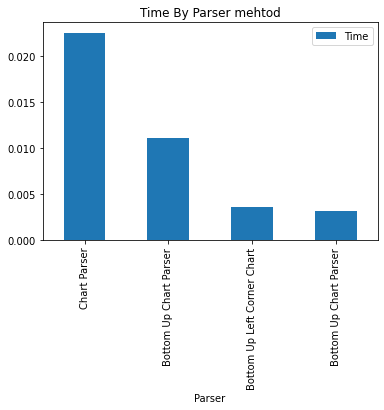

In [48]:
df.plot('Parser','Time',kind = 'bar',title = 'Time By Parser mehtod')

### Difficulties in parsing 

The main difficulty in parsing is nondeterminism. That is, at some point in the derivation of a string more than one productions are applicable, though not all of them lead to the desired string, and one can not tell which one to use until after the entire string is generated.


### Which edges are filtered out by parser and why?

Finally, it was detected that two methods have a different behaviour based on the number of edges, that is why,left Corner Chart Parser and Bottom Up Chart Parser filters have out the edges. For the first method, it is percibed that it filters edges without new word sums. 